# **Pedaling Progress: Enhancing Cycling Infrastructure for Sustainable Mobility**

![cyclingimage](https://micromobilitybiz.com/wp-content/uploads/Making-cycling-even-more-sustainable.jpg)

Note: For optimum presentation set colab theme to dark

# Section 1 : Visualising current cycling rates in West Yorkshire

<font color='magenta'><b>The following datasets show the cycle counts from 41 recorders located around the West Yorkshire district, recorded twice every hour, each day for the 12 months of 2023.</b></font> <br> <br>
Data Attribution:
*Leeds Annual Cycle Growth, (c) Leeds City Council, 2023, Leeds Annual Cycle Growth | Data Mill North. This information is licensed under the terms of the Open Government Licence.*


In [143]:
# Import required packages

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!pip install contextily
!pip install geoplot
import pyproj
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
import matplotlib.patches as patches


In [144]:
# List of csv filenames
filenames = ["Cycle Data January 2023.csv", "Cycle Data February 2023.csv", "Cycle Data March 2023.csv",
             "Cycle Data April 2023.csv", "Cycle Data May 2023.csv", "Cycle Data June 2023.csv",
             "Cycle Data July 2023.csv", "Cycle Data August 2023.csv", "Cycle Data September 2023.csv",
             "Cycle Data October 2023.csv", "Cycle Data November 2023.csv", "Cycle Data December 2023.csv"]

# Create an empty dictionary to store dataframes
dfs = {}

# Load each CSV file into a separate dataframe and store in the dictionary
for filename in filenames:
    # Extract month from filename
    month = filename.split()[2]
    # Remove '.csv' extension
    key = "data" + month  # month name and prepend "data"
    # Load CSV into dataframe
    dfs[key] = pd.read_csv(filename)

In [145]:
dfs["dataJanuary"].head()  # Verifying data has loaded correctly

,Sdate,Cosit,Period,LaneNumber,LaneDescription,LaneDirection,DirectionDescription,Volume,Flag Text
0,01/01/2023 00:00,10603,60,1,Southbound,1,SouthWest,0,Checked
1,01/01/2023 00:00,10603,60,2,Northbound,2,NorthEast,0,Checked
2,01/01/2023 01:00,10603,60,1,Southbound,1,SouthWest,0,Checked
3,01/01/2023 01:00,10603,60,2,Northbound,2,NorthEast,0,Checked
4,01/01/2023 02:00,10603,60,1,Southbound,1,SouthWest,0,Checked


The data preparation aim from this dataset is to create average values for the number of cyclists at each recorded hour of the day over the entire month. This average will include all 41 recordings from around the West Yorkshire district and will produce 12 new dataframes containing diurnal hourly averages for each month of 2023.

In [146]:
# Create a dictionary to store the new dataframes
average_dfs = {}

# Iterate through each dataframe in the dfs dictionary
for month, df in dfs.items():
  # Extract the time component from the Sdate column
    df['Hour'] = pd.to_datetime(df['Sdate'], format='%d/%m/%Y %H:%M', errors='coerce').dt.hour

    # Group by the hour component and calculate the average Volume
    average_df = df.groupby('Hour')['Volume'].mean().reset_index()

    # Rename the columns
    average_df.columns = ['Hour', 'Average_Cyclists']

    # Add missing hours (if any) with zero average cyclists
    for hour in range(24):
        if hour not in average_df['Hour'].values:
            average_df = average_df.append({'Hour': hour, 'Average_Cyclists': 0}, ignore_index=True)

    # Sort by hour
    average_df.sort_values(by='Hour', inplace=True)

    # Store the dataframe in the average_dfs dictionary
    average_dfs[month] = average_df

In [147]:
# Iterate through each dataframe in the average_dfs dictionary and display the head to validate results
for month, df in average_dfs.items():
    print(f"Head of {month}:")
    print(df.head(24))
    print()  # Add a new line for better readability between dataframes

Head of dataJanuary:
    Hour  Average_Cyclists
0      0          0.341453
1      1          0.181016
2      2          0.173457
3      3          0.166317
4      4          0.263335
5      5          1.028559
6      6          1.822764
7      7          3.270055
8      8          4.427131
9      9          2.644025
10    10          2.204364
11    11          2.475052
12    12          2.717927
13    13          3.071816
14    14          3.303549
15    15          3.366597
16    16          4.287265
17    17          5.022965
18    18          3.615031
19    19          2.301879
20    20          1.617119
21    21          1.233820
22    22          1.074739
23    23          0.565344

Head of dataFebruary:
    Hour  Average_Cyclists
0      0          0.388988
1      1          0.222469
2      2          0.175400
3      3          0.177176
4      4          0.325044
5      5          1.124334
6      6          2.063055
7      7          3.735346
8      8          5.282358
9      9   

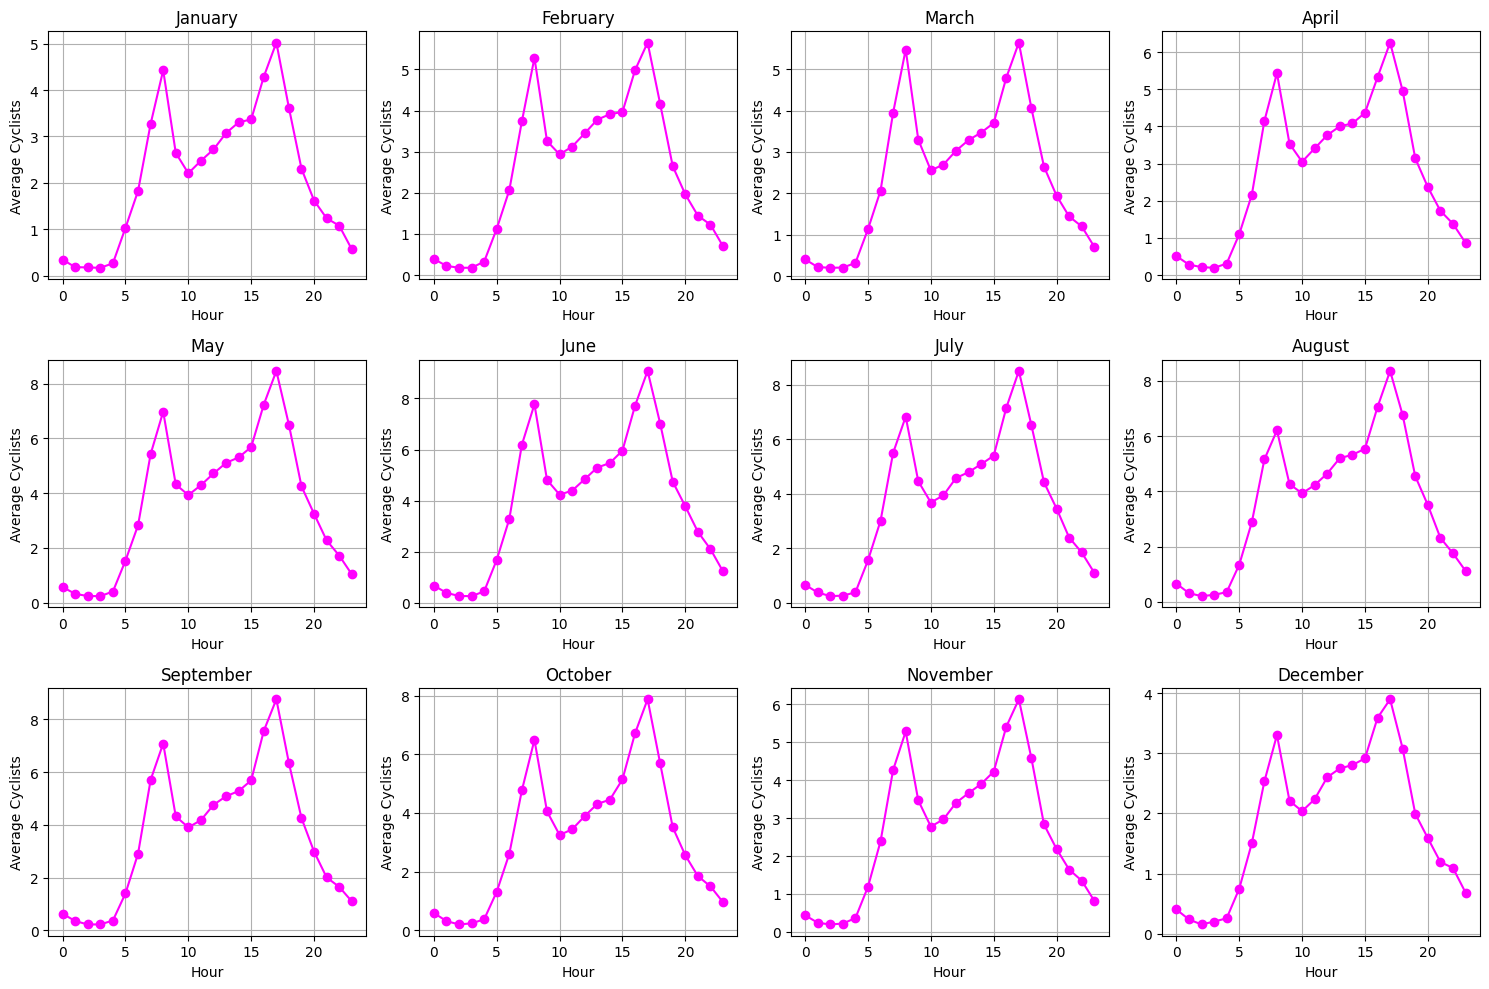

In [148]:
# Create a figure with 12 subplots for each month and axes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Iterate through each dataframe in average_dfs
for i, (month, df) in enumerate(average_dfs.items()):
   # Remove "data" prefix from month name
    month_name = month[4:]
    # Plot the data with point markers joined by lines in the colour magenta
    axes[i].plot(df['Hour'], df['Average_Cyclists'], marker='o', linestyle='-', color='magenta')
    # Set title and axis labels
    axes[i].set_title(month_name)
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Average Cyclists')
    axes[i].grid(True) # Plot on a grid

# Adjust layout
plt.tight_layout()
plt.show()

These line graphs were produced to visualise diurnal trends for each month and to decide on an appropriate correlation test based on the distribution of the data.<br><br>
From the visual results it is apparent that the data does not exhibit a normal distribution and therefore a non parametric test must be employed.



<font size="+2" color='magenta'><b>Spearmans Rank Correlation Coefficient</b></font>

Reasons why this test was selected:

<font color='magenta'> 1. Non-parametric Measure:</font> Spearman's correlation does not assume that the data follows a specific distribution, making it suitable for both continuous and ordinal data.

<font color='magenta'> 2. Linearity not assumed </font> Spearman's correlation measures the strength of a relationship between two variables by ranking the data but does not assume linearity of the relationship making it suitable for these variables (Puth et al., 2015).





Spearman's Rank Correlation for dataJanuary: correlation coefficient = 0.4026086956521739, p-value = 0.05111250253814526

Spearman's Rank Correlation for dataFebruary: correlation coefficient = 0.40086956521739125, p-value = 0.05221946082129628

Spearman's Rank Correlation for dataMarch: correlation coefficient = 0.38434782608695645, p-value = 0.06368822401812063

Spearman's Rank Correlation for dataApril: correlation coefficient = 0.40869565217391296, p-value = 0.047381337539541823

Spearman's Rank Correlation for dataMay: correlation coefficient = 0.4156521739130434, p-value = 0.043381548380330745

Spearman's Rank Correlation for dataJune: correlation coefficient = 0.40869565217391296, p-value = 0.047381337539541823

Spearman's Rank Correlation for dataJuly: correlation coefficient = 0.4165217391304347, p-value = 0.04290081752203024

Spearman's Rank Correlation for dataAugust: correlation coefficient = 0.45217391304347826, p-value = 0.0265272136321037

Spearman's Rank Correlation for

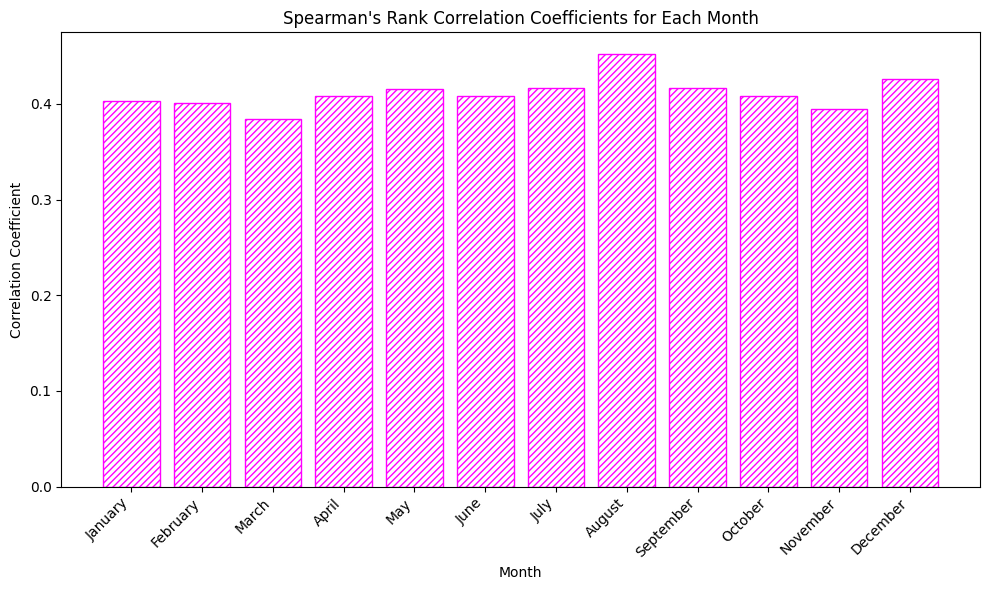


Overall average of correlation coefficients: 0.4113043478260869


In [149]:
# Spearman's rank correlation coefficient test

# Import the spearmanr function from the scipy.stats module.
from scipy.stats import spearmanr

# Create lists to store months and correlation coefficients
months = []
correlation_coefficients = []

# Iterate through each dataframe in average_dfs
for month, df in average_dfs.items():
    # Perform Spearman's rank correlation test
    corr_coef, p_value = spearmanr(df['Hour'], df['Average_Cyclists'])

    # Append month and correlation coefficient to lists
    months.append(month[4:])  # Extract month name without prefix
    correlation_coefficients.append(corr_coef)

    # Print the results for each month shwoing both correlation coefficient and the p-value
    print(f"Spearman's Rank Correlation for {month}: correlation coefficient = {corr_coef}, p-value = {p_value}")
    print()

# Create a bar plot with hatching style
plt.figure(figsize=(10, 6))
plt.bar(months, correlation_coefficients, color='None', edgecolor='magenta',hatch='/////')

# Add title and axis labels
plt.title("Spearman's Rank Correlation Coefficients for Each Month")
plt.xlabel("Month")
plt.ylabel("Correlation Coefficient")

# Show plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print()

# Print the overall average of correlation coefficients
print(f"Overall average of correlation coefficients: {sum(correlation_coefficients) / len(correlation_coefficients)}")

<font size="+2" color='magenta'>Results interpretation</font> <br>
An average Spearman correlation coefficient value of approximately <font color='magenta'>0.411</font> indicates a moderate positive correlation between the time of day and the average number of cyclists recorded. <br> The correlation tests yielded statistically significant results (p-value < 0.05) for most months. However, for January, February, March, and November, the p-values exceeded 0.05, suggesting that the observed correlations are likely due to random chance.

**Further data preparation** <br><br>Before creating the final non-spatial visualisation, the values in the 'Hour' column were changed to represent the <font color='magenta'>12 hour clock</font> format for easier interpretation of the graph. This format provides a quick indication of whether it is morning or evening without requiring mental conversion.

In [150]:
# Create a dictionary to map 12 hour values to labels
hour_labels = {0: '12am', 1: '1am', 2: '2am', 3: '3am', 4: '4am', 5: '5am',
               6: '6am', 7: '7am', 8: '8am', 9: '9am', 10: '10am', 11: '11am',
               12: '12pm', 13: '1pm', 14: '2pm', 15: '3pm', 16: '4pm', 17: '5pm',
               18: '6pm', 19: '7pm', 20: '8pm', 21: '9pm', 22: '10pm', 23: '11pm'}

# Replace the hour values with their corresponding labels in each dataframe
for df in average_dfs.values():
    df['Hour'] = [hour_labels.get(hour, hour) for hour in df['Hour']]

In [151]:
# Checking the correct creation of labels
print(hour_labels)

{0: '12am', 1: '1am', 2: '2am', 3: '3am', 4: '4am', 5: '5am', 6: '6am', 7: '7am', 8: '8am', 9: '9am', 10: '10am', 11: '11am', 12: '12pm', 13: '1pm', 14: '2pm', 15: '3pm', 16: '4pm', 17: '5pm', 18: '6pm', 19: '7pm', 20: '8pm', 21: '9pm', 22: '10pm', 23: '11pm'}


In [152]:
# Reverse the order of rows in each DataFrame in average_dfs
for month, df in average_dfs.items():
    average_dfs[month] = df.iloc[::-1]

In [153]:
# Print the head of January DataFrame in average_dfs to validate the hour values have been added
print(average_dfs["dataJanuary"]["Hour"].unique())

['11pm' '10pm' '9pm' '8pm' '7pm' '6pm' '5pm' '4pm' '3pm' '2pm' '1pm'
 '12pm' '11am' '10am' '9am' '8am' '7am' '6am' '5am' '4am' '3am' '2am'
 '1am' '12am']


<font color='magenta' size='+2'>Visualising daily cycling trends over 2023 </font>

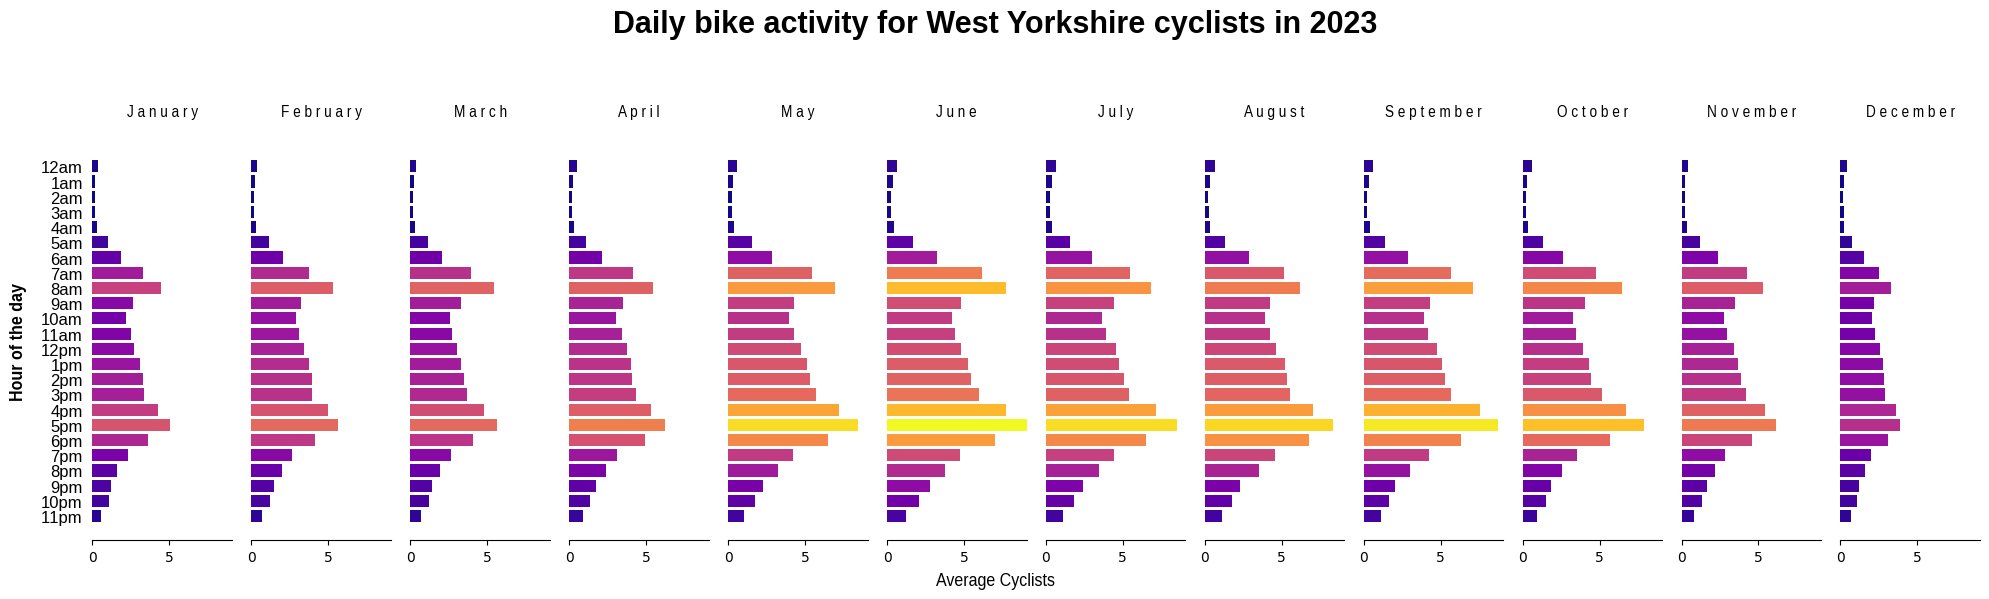

In [154]:
# Final non-spatial visualisation creation

# Determine the overall minimum and maximum average cyclists values across all months
min_cyclists = min(df['Average_Cyclists'].min() for df in average_dfs.values())
max_cyclists = max(df['Average_Cyclists'].max() for df in average_dfs.values())

# Create a single row with 12 subplots for each month
fig, axes = plt.subplots(1, 12, figsize=(20, 6), sharey=True)

# Add an overall title to the figure
fig.suptitle('Daily bike activity for West Yorkshire cyclists in 2023', fontsize=22, weight='bold',fontfamily='Liberation Sans')

# Plot each month's hourly averages as horizontal bar graphs with gradient color scheme
for i, (month, df) in enumerate(average_dfs.items()):
    ax = axes[i]
    # Define a color map
    cmap = plt.colormaps['plasma']
    # Normalise the data for all subplots to range from overall minimum to overall maximum
    norm = plt.Normalize(vmin=min_cyclists, vmax=max_cyclists)
    # Create a list of colors based on the gradient color map and normalised data
    colors = [cmap(norm(value)) for value in df['Average_Cyclists']]
    # Plot the bars with the gradient color scheme
    ax.barh(df['Hour'], df['Average_Cyclists'], color=colors)


    # Original month title string without 'data' prefix
    title = month[4:]
    # Add spaces between each letter
    spaced_title = ' '.join(title)

    # Set the title with the spaced letters and set the axis labels
    ax.set_title(f"\n{spaced_title}\n",fontfamily='Liberation Sans Narrow')
    ax.set_ylabel('Hour of the day',weight='bold', labelpad=10,fontfamily='Liberation Sans Narrow', fontsize=14) # Setting label for y axis, and adding padding
    ax.set_xlabel('Average Cyclists')

    # Set y-axis ticks and labels based on unique 'Hour' values
    ax.set_yticks(df['Hour'])
    ax.set_yticklabels(df['Hour'],fontfamily='Liberation Sans',fontsize='12')

    # Remove y-axis ticks but keep labels
    ax.tick_params(axis='y', which='both', left=False)

    # Remove y-axis label for all subplots except the first one
    if i != 0:
        ax.set_ylabel('')

    # Set x-axis range
    ax.set_xlim(0, max_cyclists)  # Standardised x-axis range
    # Remove x-axis label
    ax.set_xlabel('')

    # Remove box lines around subplot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Add a single x-axis label for the whole plot
fig.text(0.5, 0.02, 'Average Cyclists', ha='center', fontsize=14, fontfamily='Liberation Sans Narrow')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Understanding the patterns of cyclist activity throughout the day and across months is pivotal for informing decisions on urban planning and transportation infrastructure. This visualisation is therefore tailored for **urban designers, city officials, and policymakers involved in transport planning**, offering insights to enhance the efficiency and effectiveness of sustainable development and policy decisions. As could be expected from the common weather patterns in England, cycling rates increase over the summer months and are fairly uniformly low throughout winter. Peak hours in the day appear to align with 'rush hour' trends of peaking at 8am and 5pm when the majority of people travel to work or school. <br><br>
This visualisation employs 'small multiples' where the objective is to make the data inevitably comparable and repeating the figure which displays the same variable, highlights the temporal change on two scales (Midway, 2020)<br> <br>  In these graphs, colour is one of two salient dimensions to how the data is initially observed by the viewer. The second dimension is the geometry of the time-series data, allowing the audience to immediately make visual comparisons. Moreover, the use of the plasma colormap in this visualisation ensures colorblind accessibility by maintaining perceptual uniformity, as demonstrated by a study conducted by Reda and Szafir (2020), which showed enhanced inference accuracy with this colormap.

<font size= '+2' color='magenta'>References for section 1 </font>
<br>Midway, S.R., 2020. Principles of effective data visualization. Patterns, 1(9).
<br><br> Puth, M.T., Neuhäuser, M. and Ruxton, G.D., 2015. Effective use of Spearman's and Kendall's correlation coefficients for association between two measured traits. Animal Behaviour, 102, pp.77-84.<br><br>
Reda, K. and Szafir, D.A., 2020. Rainbows revisited: Modeling effective colormap design for graphical inference. IEEE transactions on visualization and computer graphics, 27(2), pp.1032-1042.


# Section 2 : Visualising spatial distribution of existing cycling infrastructure in Leeds

The aim of this section is to visualise where there is a deficiency of appropriate facilities to promote the extensive use of bikes as a mode of transport in Leeds, through the use of mesh cell density analysis and kernel density analysis.

This section begins with loading and exploring the cycle parking dataset

In [155]:
# Create variable for csv file
file_path = "Cycle parking.csv"

# Load the CSV file into a pandas DataFrame
cycle_parking = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
cycle_parking.head()

,id,name,Capacity,Access,Bicycle_parking,Covered,nodeId,latitude,longitude,iconUrl
0,cycleparking-w396664459,Un-named place of interest,NaN,NaN,stands,yes,0,53.66273,-1.48098,https://www.cyclestreets.net/images/pois/icons...
1,cycleparking-w914078552,Un-named place of interest,NaN,NaN,stands,yes,0,53.72560,-1.34171,https://www.cyclestreets.net/images/pois/icons...
2,cycleparking-w914078553,Un-named place of interest,NaN,NaN,stands,yes,0,53.72561,-1.34167,https://www.cyclestreets.net/images/pois/icons...
3,cycleparking-w892721379,Un-named place of interest,NaN,NaN,stands,NaN,0,53.72694,-1.31562,https://www.cyclestreets.net/images/pois/icons...
4,cycleparking-w901067260,Un-named place of interest,6.0,NaN,stands,no,0,53.69273,-1.30851,https://www.cyclestreets.net/images/pois/icons...


In [156]:
# Exploring possible variables within the bicycle parking column
cycle_parking['Bicycle_parking'].unique()

array(['stands', 'building', nan, 'shed', 'lockers', 'rack', 'two-tier',
       'covered', 'wall_loops', 'wave'], dtype=object)

In [157]:
# Exploring possible variables within the access column
cycle_parking['Access'].unique()

array([nan, 'customers', 'yes', 'private', 'permissive', 'designated',
       'unknown', 'permit'], dtype=object)

In [158]:
# Check for null values in each column and sum them up
cycle_parking.isnull().sum()

id                   0
name                 0
Capacity           105
Access             231
Bicycle_parking     66
Covered             79
nodeId               0
latitude             0
longitude            0
iconUrl              0
dtype: int64

In [159]:
# Check how many rows and columns the dataframe contains
cycle_parking.shape

(400, 10)



As this section of the project is exploring cycle infrastructure for **public good**, the decision was made to **remove** all rows which indicated the cycle parking had **private access only or required a permit**

In [160]:
# Delete rows where the value in the "access" column is 'private' or 'permit' and make new dataframe
public_cycle_parking = cycle_parking[~cycle_parking['Access'].isin(['private', 'permit'])]
# Verifying rows have been deleted
public_cycle_parking['Access'].unique()

array([nan, 'customers', 'yes', 'permissive', 'designated', 'unknown'],
      dtype=object)

In [161]:
# Exploring the types of parking available and their counts
public_cycle_parking['Bicycle_parking'].value_counts()

Bicycle_parking
stands        251
shed           16
lockers        12
wall_loops      7
rack            5
building        3
two-tier        3
covered         1
wave            1
Name: count, dtype: int64

<font color='magenta' size='+2'><b>Loading and plotting the shapefiles<b></font>

The shapefiles that are used for the analysis are plotted to ensure they have valid geometries and to explore their additional attribute information.

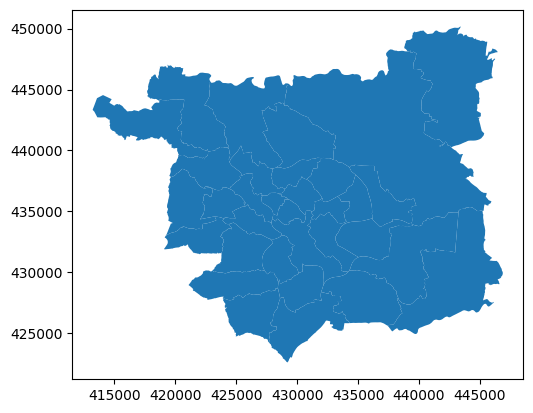

In [162]:
# Read in Leeds Wards shapefile
leedswards = gpd.read_file('LeedsWards.shp')

# Plot the shapefile data
leedswards.plot()

# Display the plot
plt.show()

In [163]:
# Explore the geodataset
leedswards.head()

,label,altname,name,code,geometry
0,E08000035E36006997,None,Adel and Wharfedale,E36006997,"POLYGON ((429495.301 445295.799, 429481.901 44..."
1,E08000035E36006998,None,Alwoodley,E36006998,"POLYGON ((428976.200 443726.900, 428975.100 44..."
2,E08000035E36006999,None,Ardsley and Robin Hood,E36006999,"POLYGON ((434340.701 425834.900, 434328.900 42..."
3,E08000035E36007000,None,Armley,E36007000,"POLYGON ((427898.999 434093.499, 427900.300 43..."
4,E08000035E36007001,None,Beeston and Holbeck,E36007001,"POLYGON ((430127.801 429939.299, 430136.300 42..."


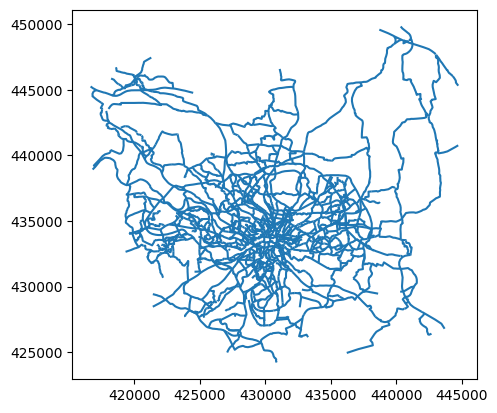

In [164]:
# Read in the cycle paths shapefile
cyclepaths = gpd.read_file('PLAN_CYCLE_ROUTES.shp')

# Plot the shapefile data
cyclepaths.plot()

# Display the plot
plt.show()

In [165]:
# Explore the geodataset
cyclepaths.head()

,TYPE,CONTACT,VERSION,COLOR,SHAPE_Leng,geometry
0,bridleway,"Vicki Franks, Transport Policy Travelwise, Hig...",V 2.0 -13/11/2013,3,2306.714628,"LINESTRING (442143.787 427958.019, 442082.826 ..."
1,Local Network Proposals,"Vicki Franks, Transport Policy Travelwise, Hig...",V 2.0 -13/11/2013,230,439.815876,"LINESTRING (425789.566 433834.960, 425779.198 ..."
2,Main Radial Route proposed,"Vicki Franks, Transport Policy Travelwise, Hig...",V 2.0 -13/11/2013,131,81.063397,"LINESTRING (425526.653 434186.449, 425522.426 ..."
3,Main Radial Route proposed,"Vicki Franks, Transport Policy Travelwise, Hig...",V 2.0 -13/11/2013,131,78.224569,"LINESTRING (425593.651 434213.008, 425603.391 ..."
4,Local Network existing,"Vicki Franks, Transport Policy Travelwise, Hig...",V 2.0 -13/11/2013,11,467.083677,"LINESTRING (425656.032 434259.088, 425705.949 ..."


In [166]:
# Explore unique values within type column
cyclepaths['TYPE'].unique()

array(['bridleway', 'Local Network Proposals',
       'Main Radial Route proposed', 'Local Network existing',
       'Main routes with no current proposals',
       'Main Radial Routes complete'], dtype=object)

<font size='+2' color='magenta'>Coordinate reference system </font> <br> It is important to ensure the layers intended for mapping align by verifying they share the same Coordinate Reference System (CRS).<br> As the dataset of parking points is in a dataframe not a geodataframe, it does not have a coordinate reference system and therefore must be converted to a geodataframe and matched to the ESPG:27700 CRS of the two shapefiles

In [167]:
# Checking leedswards crs
leedswards.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [168]:
# Checking cycle paths crs
cyclepaths.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [169]:
# Create Point geometries from latitude and longitude columns, using EPSG:4326 CRS
point_geom = gpd.points_from_xy(public_cycle_parking['longitude'], public_cycle_parking['latitude'])

# Convert the DataFrame to a GeoDataFrame
public_cycle_parking = gpd.GeoDataFrame(public_cycle_parking, geometry=point_geom, crs='EPSG:4326')

# Convert the GeoDataFrame to British National Grid CRS (EPSG:27700)
public_cycle_parking = public_cycle_parking.to_crs(epsg=27700)

In [170]:
# Checking public cycle parking crs
public_cycle_parking.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<font size='+2' color='magenta'>Preliminary pattern visualisation</font><br><br> The visualisation of data even in a simple form can significantly enhance a researcher's cognitive capacity to manage the dimensionality and complexity of datasets (Pettit et al., 2012). Therefore, before analysis commences, both the cycle paths and parking point data is mapped to help reveal additonal insights.

In [171]:
# Replace "bridleway" with "Bridleway" in the TYPE column for continuity with other labels
cyclepaths['TYPE'] = cyclepaths['TYPE'].replace('bridleway', 'Bridleway')

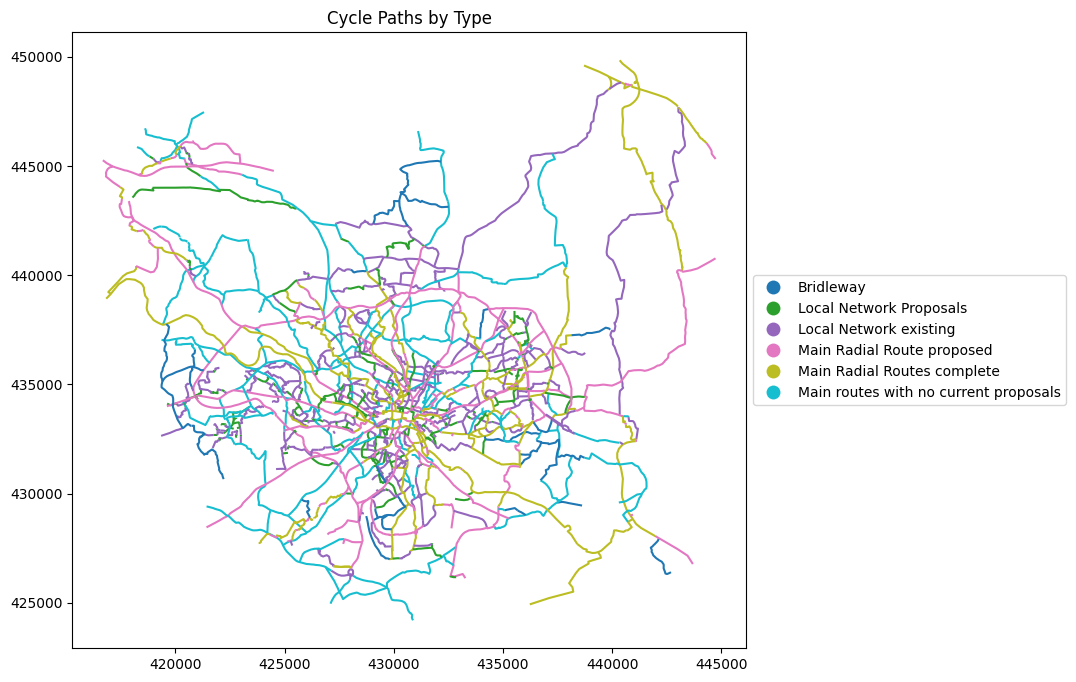

In [172]:
# Plot the shapefile data, colouring by the TYPE column and including a legend
cyclepaths.plot(column='TYPE', legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1.0, 0.5)}, figsize=(12, 8))

# Add a title
plt.title('Cycle Paths by Type')

# Display the plot
plt.show()

To produce an initial visual representation of the spatial distribution of public cycle parking between the wards in Leeds, the points were overlayed on the metropolitan district ward boundaries.

In [173]:
# Clip the public cycle parking points to only include points within the Leeds wards
clipped_pcp= gpd.clip(public_cycle_parking, leedswards)

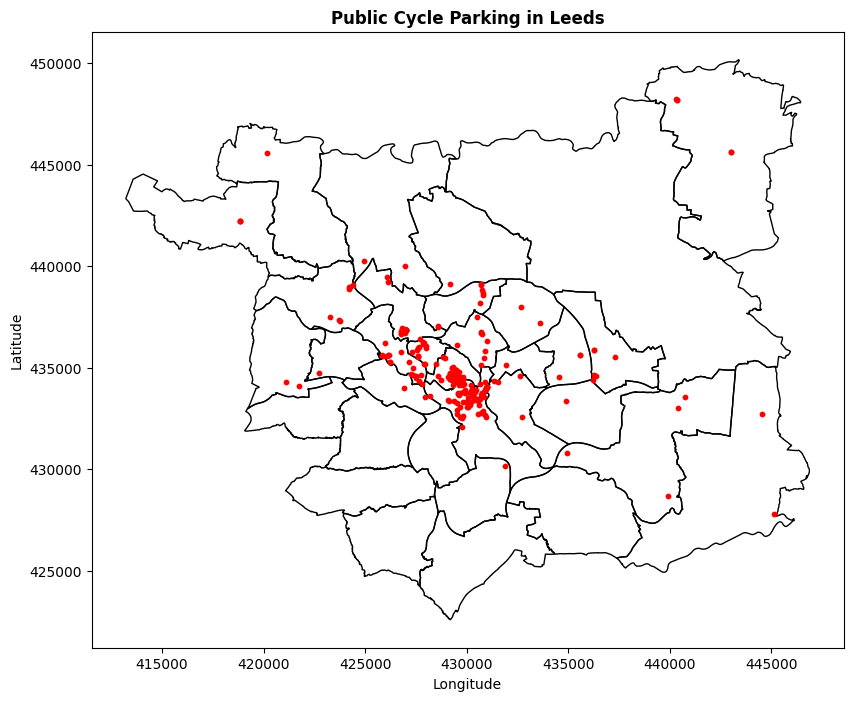

In [174]:
# Plot the Leeds wards
leedswards.plot(figsize=(10, 8), edgecolor='black', facecolor='none')

# Plot the public cycle parking points on top
clipped_pcp.plot(ax=plt.gca(), color='red', markersize=10)

# Add title and axis labels
plt.title('Public Cycle Parking in Leeds', weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

It is already visually clear that public bike parking is ubiquitous in the city centre and yet highly sparse when moving outwards into the peripheral wards.

<font color='magenta' size='+2'>Cell based route density analysis</font> <br>
Mesh density analysis can be employed to evaluate the coverage of current and planned cycle routes, helping to identify any gaps. This method involves calculating the length of cycle routes within each square cell. In urban areas, cycle routes should ideally be spaced 250m to 400m apart, but this distance increases in outer suburbs where development density is lower (DfT, 2020).

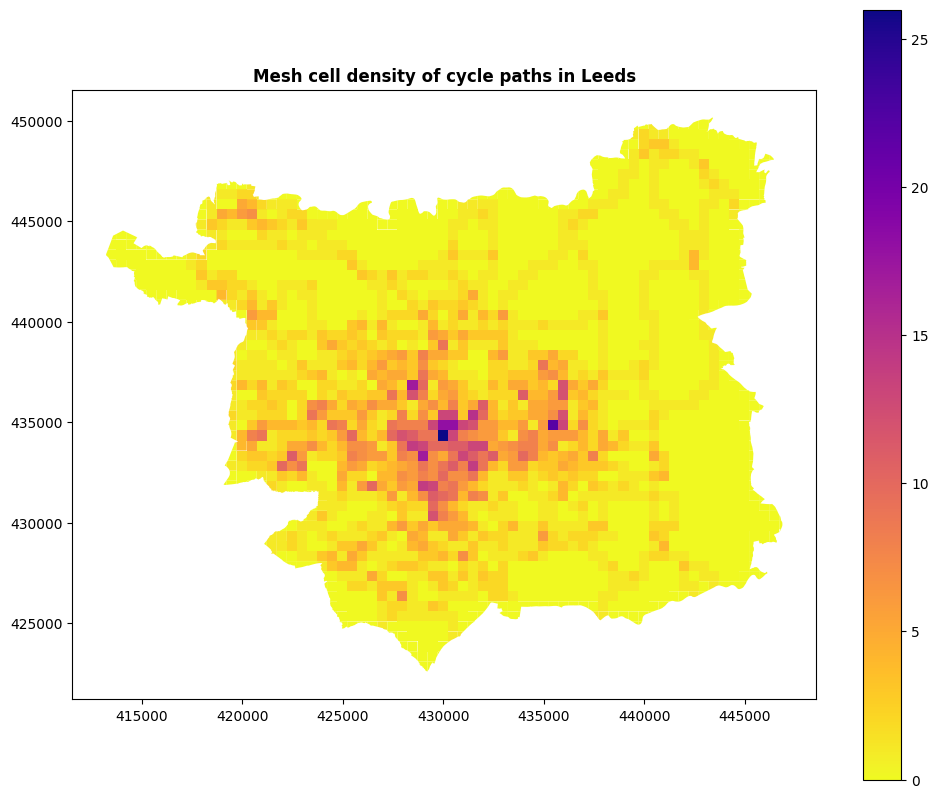

In [175]:
from shapely.geometry import Polygon

# Define the extent of the study area
xmin, ymin, xmax, ymax = leedswards.total_bounds

# Define the grid cell size
cell_size = 500 # meters

# Create arrays of x and y coordinates for the grid
x = np.arange(xmin, xmax + cell_size, cell_size)
y = np.arange(ymin, ymax + cell_size, cell_size)

# Create a meshgrid from the x and y coordinates
X, Y = np.meshgrid(x, y)

# Convert the meshgrid to polygons

# Initialize an empty list to store the polygon objects
grid_cells = []

# Loop over the x-coordinates except the last one
for i in range(len(x) - 1):
    # Loop over the y-coordinates except the last one
    for j in range(len(y) - 1):
        # Create a polygon using four corner points:
        polygon = Polygon([
            (x[i], y[j]),
            (x[i+1], y[j]),
            (x[i+1], y[j+1]),
            (x[i], y[j+1])
        ])
        # Append the created polygon to the list of grid cells
        grid_cells.append(polygon)


# Create a GeoDataFrame from the grid cells
grid_gdf = gpd.GeoDataFrame(geometry=grid_cells, crs=cyclepaths.crs)

# Clip the grid cells to the extent of leedswards
grid_gdf_clipped = gpd.clip(grid_gdf, leedswards.geometry)
# Clip the cycle paths to the extent of leedswards
cyclepaths_clip = gpd.clip(cyclepaths, leedswards.geometry)

# Count the number of cycle paths that intersect each grid cell
grid_gdf_clipped['cycle_path_count'] = grid_gdf_clipped.geometry.apply(
    lambda cell: len(cyclepaths_clip[cyclepaths_clip.intersects(cell)])
)

# Visualise the mesh density with cycle paths layered underneath
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf_clipped.plot(column='cycle_path_count', cmap='plasma_r', ax=ax, legend=True, edgecolor='none')
ax.set_title('Mesh cell density of cycle paths in Leeds', weight='bold')


plt.show()


<font color='magenta' size='+2'> Calculating Kernel Density estimation for cycle parking points</font>

KDE creates a continuous and seamless surface map, smoothing out any gaps in the data through interpolation (Hashimoto et al., 2016). Consequently, it can effectively identify areas with high demand for bike parking, even in places where specific bike parking points are scarce or non-existent.

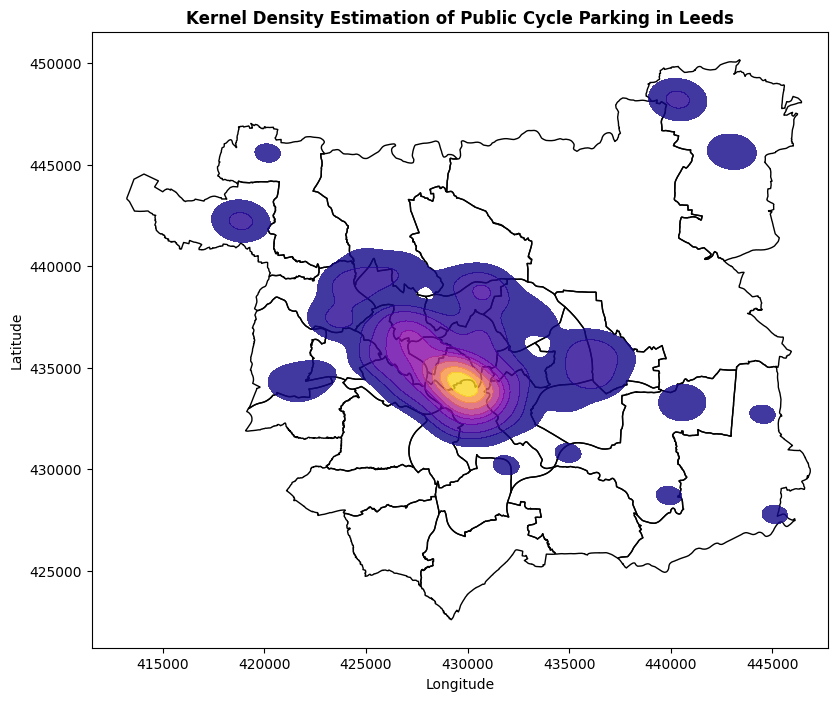

In [176]:
# Plot the Leeds wards
fig, ax = plt.subplots(figsize=(10, 8))
leedswards.plot(ax=ax, edgecolor='black', facecolor='none')

# Extract x and y coordinates from the clipped public cycle parking points
x = clipped_pcp.geometry.x
y = clipped_pcp.geometry.y

# Plot the kernel density estimation using Seaborn
sns.kdeplot(x=x, y=y, fill=True, cmap='plasma', bw_adjust=0.6, ax=ax, alpha=0.8)

# Add title and axis labels
plt.title('Kernel Density Estimation of Public Cycle Parking in Leeds', weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

<font color='magenta' size='+2'> Identify Areas with High Cycle Lane Density but Low Parking Density </font>
<br>This part of the analysis combines the cell density of cycle lanes with the kernel density of bike parking and generates a map that shows areas where the cycle lane density is high but the parking density is low. The KDE and cycle path densities are both normalised and compared to highlight discrepancies. The purpose of this is to inform the allocation of resources effectively by identifying where additional parking might be needed or where cycling infrastructure is well-used and could be expanded. The yellow areas of the map would exhibit high densities of both types of infrastructure and the darker colours would have a deficiency of cycle parking.

In [177]:
from shapely.geometry import Polygon
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import gaussian_kde

# Define the extent of the study area
xmin, ymin, xmax, ymax = leedswards.total_bounds

# Define the grid cell size
cell_size = 500 # meters

# Create arrays of x and y coordinates from the minimum to the maximum bounds, incremented by the cell size
x = np.arange(xmin, xmax + cell_size, cell_size)
y = np.arange(ymin, ymax + cell_size, cell_size)

# Convert the meshgrid to polygons by creating a list of grid cells from iterating over the xy coordinate arrays
grid_cells = []
for i in range(len(x) - 1):
    for j in range(len(y) - 1):
        polygon = Polygon([(x[i], y[j]), (x[i+1], y[j]), (x[i+1], y[j+1]), (x[i], y[j+1])])
        grid_cells.append(polygon)

# Create a GeoDataFrame from the grid cells and assign the same crs
grid_gdf = gpd.GeoDataFrame(geometry=grid_cells, crs=cyclepaths.crs)

# Clip the grid cells to the extent of leedswards
grid_gdf_clipped = gpd.clip(grid_gdf, leedswards.geometry)
# Clip the cycle paths to the extent of leedswards
cyclepaths_clip = gpd.clip(cyclepaths, leedswards.geometry)

# Add a new column to the clipped grid GeoDataFrame, counting how many cycle paths intersect each grid cell
grid_gdf_clipped['cycle_path_count'] = grid_gdf_clipped.geometry.apply(
    lambda cell: len(cyclepaths_clip[cyclepaths_clip.intersects(cell)])
)

# Normalize the cycle path density on a scale between 0 and 1
scaler = MinMaxScaler()
grid_gdf_clipped['norm_cycle_path_count'] = scaler.fit_transform(grid_gdf_clipped[['cycle_path_count']])

# Extract the x and y coordinates from the geometries of the public cycle parking points
x_parking = clipped_pcp.geometry.x
y_parking = clipped_pcp.geometry.y

# Calculate KDE on the same grid
# Stack the x and y coordinates of the parking points for KDE calculation
positions = np.vstack([x_parking, y_parking])
# Create a Gaussian KDE object with the stacked coordinates and specified bandwidth
kde = gaussian_kde(positions, bw_method=0.6)
# Initialize an array to store KDE values for each grid cell
kde_values = np.zeros(len(grid_gdf_clipped))

# Loop through each grid cell to calculate KDE at its center
for i, cell in enumerate(grid_gdf_clipped.geometry):
    minx, miny, maxx, maxy = cell.bounds  # Get the bounding box of the current grid cell
   # Calculate the center of the grid cell
    x_center = (minx + maxx) / 2
    y_center = (miny + maxy) / 2
    kde_values[i] = kde([x_center, y_center])[0]  # Extract the scalar value at the cntre of the grid cell and store it

# Normalise the KDE values
grid_gdf_clipped['kde_parking'] = scaler.fit_transform(kde_values.reshape(-1, 1))

# Calculate the difference to find areas with high cycle lane density but low parking density
grid_gdf_clipped['difference'] = grid_gdf_clipped['norm_cycle_path_count'] - grid_gdf_clipped['kde_parking']



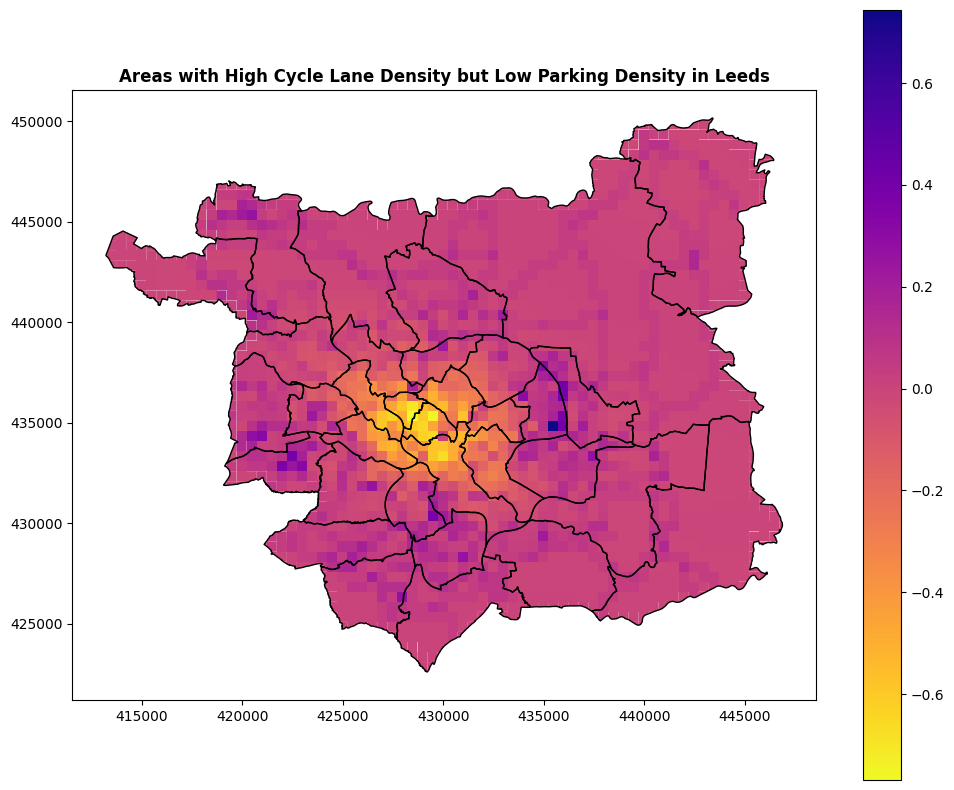

In [178]:
# Plot the result
fig, ax = plt.subplots(figsize=(12, 10))
grid_gdf_clipped.plot(column='difference', cmap='plasma_r', ax=ax, legend=True, edgecolor='none')
leedswards.plot(ax=ax, edgecolor='black', facecolor='none')

plt.title('Areas with High Cycle Lane Density but Low Parking Density in Leeds', weight='bold')
plt.show()

In [179]:
# Perform spatial join to assign each grid cell to a ward
grid_with_wards = gpd.sjoin(grid_gdf_clipped, leedswards[['name', 'geometry']], how='left', op='within')

# Calculate the average cell value for each ward
ward_avg_values = grid_with_wards.groupby('name')['difference'].mean().reset_index()

# Merge the average values with the Leeds ward polygons
leedswards_with_avg = leedswards.merge(ward_avg_values, on='name')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


<font color='magenta' size='+2'> Visualising wards with insufficient bike parking infrastructure </font>

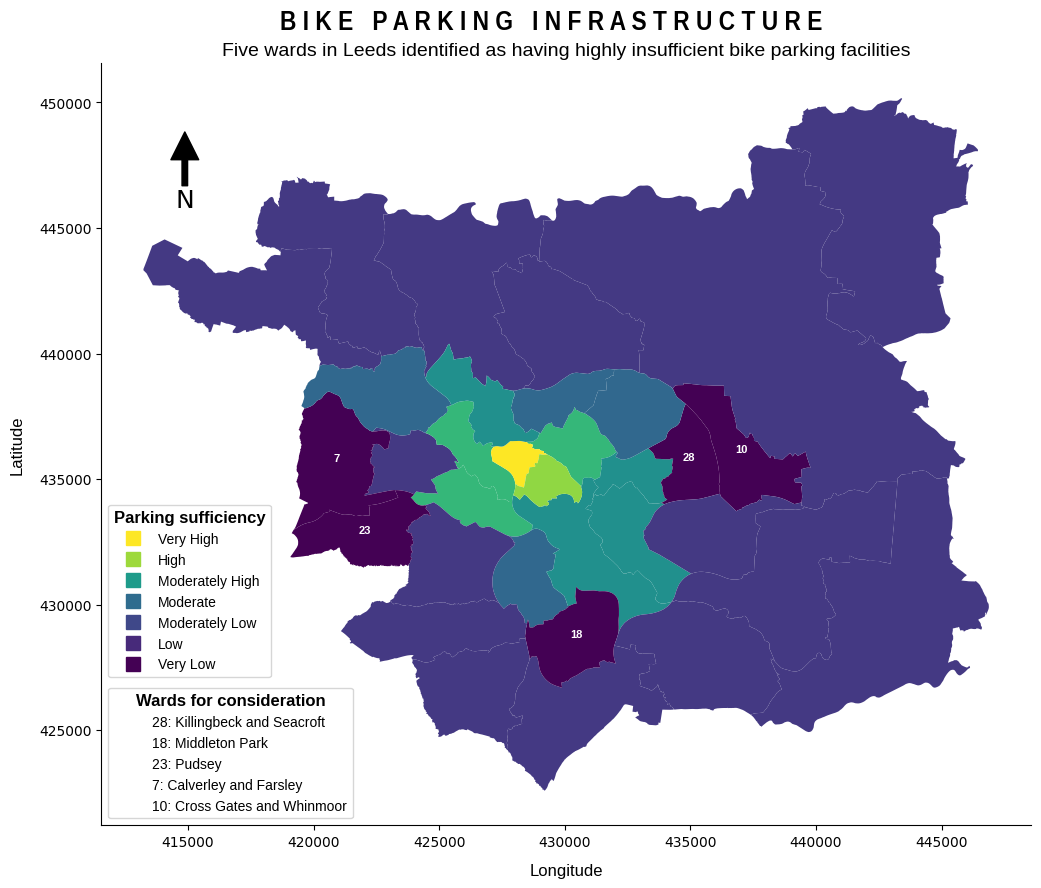

In [180]:
import mapclassify as mc
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

# Plot a choropleth map based on the average values using natural breaks classification with 7 classes
fig, ax = plt.subplots(figsize=(12, 10))
leedswards_with_avg.plot(column='difference', scheme='fisherjenks', k=7, cmap='viridis_r', ax=ax, legend=False, edgecolor='none')

# Add the Jenks classification legend
scheme = mc.FisherJenks(leedswards_with_avg['difference'], k=7)

# Define your custom labels for the legend
custom_labels = ['Very High', 'High', 'Moderately High', 'Moderate', 'Moderately Low', 'Low', 'Very Low']

# Get the colormap and normalise it to the data range
cmap = plt.get_cmap('viridis_r')
norm = mcolors.Normalize(vmin=min(leedswards_with_avg['difference']), vmax=max(leedswards_with_avg['difference']))

# Create custom legend for Jenks classes using the colormap
handles = [plt.Line2D([0], [0], color=cmap(norm(scheme.bins[i])), marker='s', linestyle='', markersize=10) for i in range(len(scheme.bins))]
jenks_legend = ax.legend(handles, custom_labels, title='Parking sufficiency', bbox_to_anchor=(0.19, 0.43))

# Add numbers to the top 5 wards
top_class_labels = leedswards_with_avg['difference'].nlargest(5).index
wards_in_top_class = leedswards_with_avg.loc[top_class_labels]
for idx, row in wards_in_top_class.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, str(idx), ha='center', fontsize=8, color='white', fontweight='bold', fontfamily='Liberation Sans')

# Create a legend mapping ward numbers to ward names for the top 5 wards
legend_labels = {str(idx): f"{idx}: {name}" for idx, name in zip(wards_in_top_class.index, wards_in_top_class['name'])}
legend_handles = [plt.Line2D([0], [0], color='w') for _ in range(len(legend_labels))]
wards_legend = ax.legend(legend_handles, legend_labels.values(), title='Wards for consideration', loc='lower left')
wards_legend.get_title().set_fontweight('bold')  # Set legend title font weight to bold

# Customise both legends font
for legend in [jenks_legend, wards_legend]:
    legend_title = legend.get_title().get_text()
    legend.set_title(legend_title, {'weight': 'bold', 'family': 'Liberation Sans', 'size': 12})  # Title font
    for text in legend.get_texts():
        text.set_fontsize(10)  # Set label font size
        text.set_fontfamily('Liberation Sans')  # Set label font family
        text.set_fontweight('normal')  # Set label font weight

ax.add_artist(jenks_legend)  # Ensure the Jenks legend is added to the plot

# Remove the top and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the main title using fig.suptitle
main_title = 'Bike Parking Infrastructure'
spaced_main_title = ' '.join(main_title) # Add spaces between letters
fig.suptitle(spaced_main_title.upper(), fontfamily='Liberation Sans Narrow', fontweight='bold', fontsize=20, ha='center', y=0.93)

# Set the subtitle below the main title
subtitle = 'Five wards in Leeds identified as having highly insufficient bike parking facilities'
ax.set_title(subtitle, fontfamily='Liberation Sans', fontsize=14, ha='center')

# Add axis labels for longitude and latitude with spacing
ax.set_xlabel('Longitude', fontfamily='Liberation Sans', fontsize=12, labelpad=10)  # Adjust labelpad for x-axis
ax.set_ylabel('Latitude', fontfamily='Liberation Sans', fontsize=12, labelpad=10)  # Adjust labelpad for y-axis


arrow_x = 0.09  # Set the x-coordinate of the arrow's tail
arrow_y = 0.91  # Set the y-coordinate of the arrow's tail
arrow_length = 0.09 # Set the length of the arrow

# Add the north arrow annotation to the plot
ax.annotate('N', xy=(arrow_x, arrow_y), xytext=(arrow_x, arrow_y - arrow_length), # Position of arrows tail and arrows text
               arrowprops=dict(facecolor='black', headwidth=20, headlength=20), # Properties of the arrow and arrow text
               ha='center', va='center', fontsize=18, xycoords='axes fraction')

plt.show()


This map draws together the previous analysis to pinpoint specific wards in Leeds that could benefit from enhancing their cycle infrastructure.

From a purely visual perspective, there is no evident clustering of wards with insufficient bike parking in any particular area of Leeds. Instead, these wards are dispersed throughout various parts of the city, indicating that the issue is widespread rather than localised. The central wards appear to have better bike parking infrastructure, likely due to higher demand and urban planning priorities centered on central locations. In contrast, the identified wards are primarily situated on the city's periphery. For urban planners, this map highlights the need to address the disparity in bike parking facilities. Ensuring that wards with developed or proposed cycle lanes also have adequate bike parking would promote a more sustainable and integrated transportation system across the city.

Choropleths are common for displaying area-based data on maps because they are easy to understand and effectively maintain the geographic relationships and boundaries of the areas they represent. This makes it simple for the viewer to interpret the data in a spatial context. Moreover, using larger geographical units, such as ward-level data in this case, ensures the analysis maintains perceivable areas (McNabb et al., 2018).

Once again, a colourblind suitable colour ramp (viridis) with perceptual uniformity was employed to ensure a high level of accessiblity in interpretation (Crameri et al., 2020). Natural breaks was used as the classification scheme for idenitifying wards in need. Using this scheme, which minimises each class's deviation from its mean and maximises the deviation from other class means (Chen et al., 2013), enabled the prioritisation of wards in the top class that exhibit similarly high levels of parking deficiency.


<font size= '+2' color='magenta'>References for section 2</font>
<br> Chen, J., Yang, S.T., Li, H.W., Zhang, B. and Lv, J.R., 2013. Research on geographical environment unit division based on the method of natural breaks (Jenks). The International Archives of the Photogrammetry, Remote Sensing and Spatial Information Sciences, 40, pp.47-50.
<br><br>Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), p.5444.
<br><br>Department for Transport (2020) Cycle Infrastructure Design (LTN 1/20), GOV.UK. Available at: https://www.gov.uk/government/publications/cycle-infrastructure-design-ltn-120 (Accessed: 17 May 2024).
<br><br>Hashimoto, S., Yoshiki, S., Saeki, R., Mimura, Y., Ando, R. and Nanba, S., 2016. Development and application of traffic accident density estimation models using kernel density estimation. Journal of traffic and transportation engineering (English edition), 3(3), pp.262-270.
<br><br>McNabb, L., Laramee, R.S. and Fry, R., 2018, July. Dynamic choropleth maps–using amalgamation to increase area perceivability. In 2018 22nd International Conference Information Visualisation (IV) (pp. 284-293). IEEE.
<br><br> Pettit, C., Widjaja, I., Russo, P., Sinnott, R.I.C.H.A.R.D., Stimson, R. and Tomko, M.A.R.T.I.N., 2012. Visualisation support for exploring urban space and place. ISPRS Annals of the Photogrammetry, Remote Sensing and Spatial Information Sciences, 1, pp.153-158.